In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'merchants.csv', 'sample_submission.csv', 'test.csv', 'historical_transactions.csv', 'Data_Dictionary.xlsx', 'new_merchant_transactions.csv']


In [2]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1)

In [3]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
merchants = pd.read_csv("../input/merchants.csv")

In [4]:
# new_transactions = pd.read_csv('../input/new_merchant_transactions.csv',
#                                parse_dates=['purchase_date'])

historical_transactions = pd.read_csv('../input/historical_transactions.csv',
                                      parse_dates=['purchase_date'])

# def binarize(df):
#     for col in ['authorized_flag', 'category_1']:
#         df[col] = df[col].map({'Y':1, 'N':0})
#     return df

# historical_transactions = binarize(historical_transactions)
# new_transactions = binarize(new_transactions)

In [5]:
train.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


In [6]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [7]:
merchants.describe()

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,334696.000000,334696.000000,322809.000000
mean,31028.736143,423.131663,25.116404,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335,102.917926,11.860942,2.380002
std,31623.043426,252.898046,9.807371,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138,107.090673,6.176889,1.562661
min,1.000000,-1.000000,-1.000000,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000,-1.000000,-1.000000,1.000000
25%,3612.000000,222.000000,19.000000,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000,-1.000000,9.000000,1.000000
50%,19900.000000,373.000000,27.000000,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000,69.000000,9.000000,2.000000
75%,51707.250000,683.000000,33.000000,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000,182.000000,16.000000,4.000000
max,112586.000000,891.000000,41.000000,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000,347.000000,24.000000,5.000000


In [8]:
merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [9]:
historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


## 우선 특정 카드 하나 (C_ID_92a2005557) 에 대해서 알아보자

In [10]:
train[train["card_id"] == "C_ID_92a2005557"]

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283


In [11]:
historical_transactions[historical_transactions["card_id"] == "C_ID_92a2005557"].sort_values(["purchase_date"], ascending=[True])

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
12454921,Y,C_ID_92a2005557,69,N,0,A,560,M_ID_1a81c358a3,-8,-0.710529,2017-06-27 14:18:08,1.0,9,34
12455076,Y,C_ID_92a2005557,69,N,0,A,560,M_ID_1a81c358a3,-8,-0.691415,2017-06-29 14:04:50,1.0,9,34
12455072,Y,C_ID_92a2005557,69,N,0,A,195,M_ID_cc72dac895,-8,-0.669356,2017-06-29 14:11:06,1.0,9,34
12454879,Y,C_ID_92a2005557,69,N,0,A,560,M_ID_b3c49066d8,-7,-0.727944,2017-07-01 09:02:20,1.0,9,34
12454928,Y,C_ID_92a2005557,69,N,0,A,80,M_ID_fe749a3c97,-7,-0.643435,2017-07-02 11:04:43,1.0,9,37
12454972,Y,C_ID_92a2005557,69,N,0,A,278,M_ID_295b485138,-7,-0.475664,2017-07-02 16:10:59,1.0,9,37
12454953,Y,C_ID_92a2005557,69,N,0,A,454,M_ID_8e24779ad0,-7,-0.701828,2017-07-02 16:56:29,1.0,9,39
12454979,Y,C_ID_92a2005557,69,N,0,A,560,M_ID_1a81c358a3,-7,-0.707689,2017-07-03 14:25:16,1.0,9,34
12455098,Y,C_ID_92a2005557,69,N,0,A,80,M_ID_5ba019a379,-7,-0.656749,2017-07-04 14:02:20,1.0,9,37
12455119,Y,C_ID_92a2005557,69,N,0,A,454,M_ID_eb154b339f,-7,-0.724368,2017-07-04 14:05:19,1.0,9,39


In [12]:
user_data = historical_transactions[historical_transactions["card_id"] == "C_ID_92a2005557"]
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 12454872 to 12455131
Data columns (total 14 columns):
authorized_flag         260 non-null object
card_id                 260 non-null object
city_id                 260 non-null int64
category_1              260 non-null object
installments            260 non-null int64
category_3              260 non-null object
merchant_category_id    260 non-null int64
merchant_id             254 non-null object
month_lag               260 non-null int64
purchase_amount         260 non-null float64
purchase_date           260 non-null datetime64[ns]
category_2              260 non-null float64
state_id                260 non-null int64
subsector_id            260 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 30.5+ KB


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


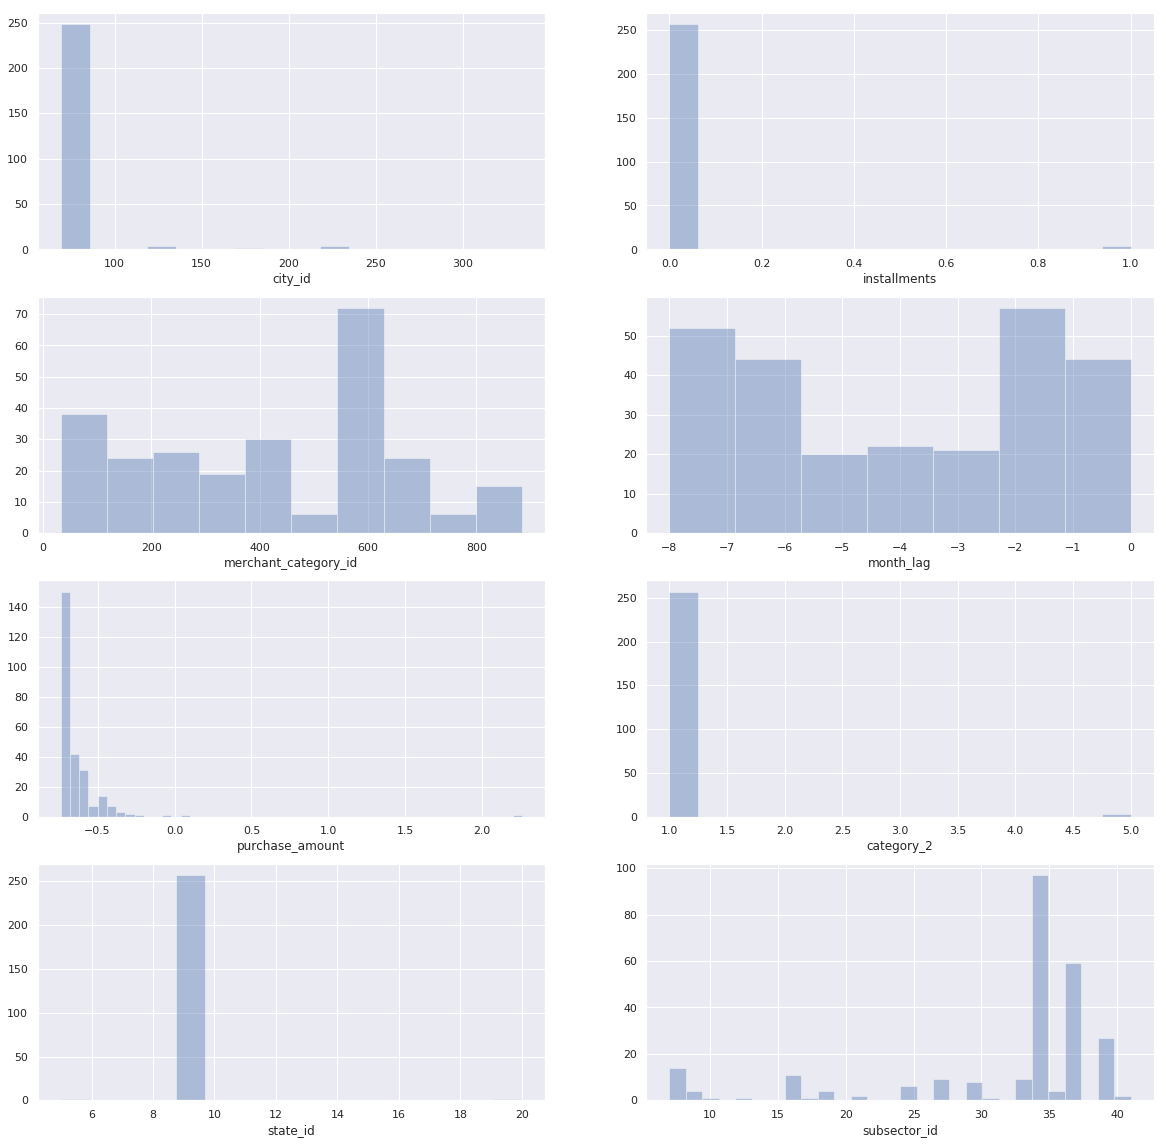

In [13]:
f, axes = plt.subplots(4, 2, figsize=(20,20), sharex=False)
for ax, key in zip(axes.flat, user_data._get_numeric_data().columns):
    sns.distplot(user_data[key], ax=ax, kde=False)

In [14]:
categorical_columns = list(set(historical_transactions_sample.columns) - set(historical_transactions_sample._get_numeric_data().columns))
f, axes = plt.subplots(4, 1, figsize=(20,20), sharex=False)
for ax, key in zip(axes.flat, categorical_columns):
    sns.countplot(x=key, data=user_data, ax=ax)

NameError: name 'historical_transactions_sample' is not defined

In [15]:
user_data["merchant_id"].value_counts()

M_ID_1a81c358a3    32
M_ID_b3c49066d8    23
M_ID_5ba019a379    17
M_ID_800c9d11e3    13
M_ID_cc72dac895    12
M_ID_50f575c681    10
M_ID_820c7b73c8     6
M_ID_03bb6f5a3b     5
M_ID_f8ff2ae0cb     5
M_ID_00a6ca8a8a     5
M_ID_da01980131     5
M_ID_eb154b339f     5
M_ID_6b718b517f     5
M_ID_0888bdef7e     4
M_ID_c124c4467a     3
M_ID_36f9e41993     3
M_ID_5518af06f8     3
M_ID_fe749a3c97     3
M_ID_0e9fbd2686     3
M_ID_779cdda4f8     2
M_ID_fde710ae59     2
M_ID_010cf2e0d5     2
M_ID_338b03705f     2
M_ID_d8c83cb0e9     2
M_ID_d2544479be     2
M_ID_8e24779ad0     2
M_ID_0ef7af562d     2
M_ID_295b485138     2
M_ID_b790230ee9     2
M_ID_27ef0c464c     2
                   ..
M_ID_2c4b8c61f6     1
M_ID_5357def7c9     1
M_ID_1ebcc07c29     1
M_ID_365f0deb25     1
M_ID_c29a18356f     1
M_ID_07859bda27     1
M_ID_81fdaa610e     1
M_ID_96a479a58e     1
M_ID_ed31e01703     1
M_ID_4e5b36c71d     1
M_ID_f1ab535812     1
M_ID_1790e57dc1     1
M_ID_2621918784     1
M_ID_9122ebdd02     1
M_ID_3b4a8

### 상품 M_ID_1a81c358a3 에 대해서 알아보자

In [16]:
merchants[merchants["merchant_id"] == "M_ID_1a81c358a3"]

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
322170,M_ID_1a81c358a3,33363,560,34,-0.017811,-0.017811,N,C,B,0.93,0.979454,3,0.9,0.953233,6,0.93,0.981699,12,Y,69,9,1.0


### 더 이상 들어갈 수 없으니 상품들에 대해서 조금 더 알아보자

In [17]:
 merchants.describe()

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,334696.000000,334696.000000,322809.000000
mean,31028.736143,423.131663,25.116404,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335,102.917926,11.860942,2.380002
std,31623.043426,252.898046,9.807371,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138,107.090673,6.176889,1.562661
min,1.000000,-1.000000,-1.000000,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000,-1.000000,-1.000000,1.000000
25%,3612.000000,222.000000,19.000000,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000,-1.000000,9.000000,1.000000
50%,19900.000000,373.000000,27.000000,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000,69.000000,9.000000,2.000000
75%,51707.250000,683.000000,33.000000,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000,182.000000,16.000000,4.000000
max,112586.000000,891.000000,41.000000,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000,347.000000,24.000000,5.000000


In [18]:
merchants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
merchant_id                    334696 non-null object
merchant_group_id              334696 non-null int64
merchant_category_id           334696 non-null int64
subsector_id                   334696 non-null int64
numerical_1                    334696 non-null float64
numerical_2                    334696 non-null float64
category_1                     334696 non-null object
most_recent_sales_range        334696 non-null object
most_recent_purchases_range    334696 non-null object
avg_sales_lag3                 334683 non-null float64
avg_purchases_lag3             334696 non-null float64
active_months_lag3             334696 non-null int64
avg_sales_lag6                 334683 non-null float64
avg_purchases_lag6             334696 non-null float64
active_months_lag6             334696 non-null int64
avg_sales_lag12                334683 non-null float64
avg_purchases_lag12    

In [19]:
merchants_sample = merchants.sample(1000)
merchants_sample.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
51839,M_ID_923c0a2edc,13196,367,16,-0.047556,-0.047556,N,E,E,0.95,0.969697,3,1.19,1.146465,6,1.17,1.154545,10,N,-1,24,2.0
224277,M_ID_2290e13f7d,35880,705,33,-0.057471,-0.057471,N,D,D,0.91,0.918301,3,0.89,0.859886,6,0.90,0.907067,12,N,-1,13,4.0
249473,M_ID_33009af483,3920,419,1,-0.047556,-0.047556,N,D,D,1.14,1.210582,3,1.13,1.142328,6,1.18,1.147090,12,N,233,9,1.0
297260,M_ID_bad0846bfd,91504,574,22,-0.057471,-0.057471,N,C,D,0.95,0.955882,3,0.89,0.926471,6,0.79,0.830882,12,N,123,19,3.0
95261,M_ID_7630df9d90,8905,367,16,-0.057471,-0.057471,N,E,E,0.65,0.769231,3,0.52,0.683761,6,0.35,0.542735,12,N,117,9,1.0


In [20]:
merchants_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 51839 to 322523
Data columns (total 22 columns):
merchant_id                    1000 non-null object
merchant_group_id              1000 non-null int64
merchant_category_id           1000 non-null int64
subsector_id                   1000 non-null int64
numerical_1                    1000 non-null float64
numerical_2                    1000 non-null float64
category_1                     1000 non-null object
most_recent_sales_range        1000 non-null object
most_recent_purchases_range    1000 non-null object
avg_sales_lag3                 1000 non-null float64
avg_purchases_lag3             1000 non-null float64
active_months_lag3             1000 non-null int64
avg_sales_lag6                 1000 non-null float64
avg_purchases_lag6             1000 non-null float64
active_months_lag6             1000 non-null int64
avg_sales_lag12                1000 non-null float64
avg_purchases_lag12            1000 non-null float64


In [21]:
merchants_sample["category_2"] = merchants_sample["category_2"].fillna(value=0)

In [22]:
merchants_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 51839 to 322523
Data columns (total 22 columns):
merchant_id                    1000 non-null object
merchant_group_id              1000 non-null int64
merchant_category_id           1000 non-null int64
subsector_id                   1000 non-null int64
numerical_1                    1000 non-null float64
numerical_2                    1000 non-null float64
category_1                     1000 non-null object
most_recent_sales_range        1000 non-null object
most_recent_purchases_range    1000 non-null object
avg_sales_lag3                 1000 non-null float64
avg_purchases_lag3             1000 non-null float64
active_months_lag3             1000 non-null int64
avg_sales_lag6                 1000 non-null float64
avg_purchases_lag6             1000 non-null float64
active_months_lag6             1000 non-null int64
avg_sales_lag12                1000 non-null float64
avg_purchases_lag12            1000 non-null float64


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


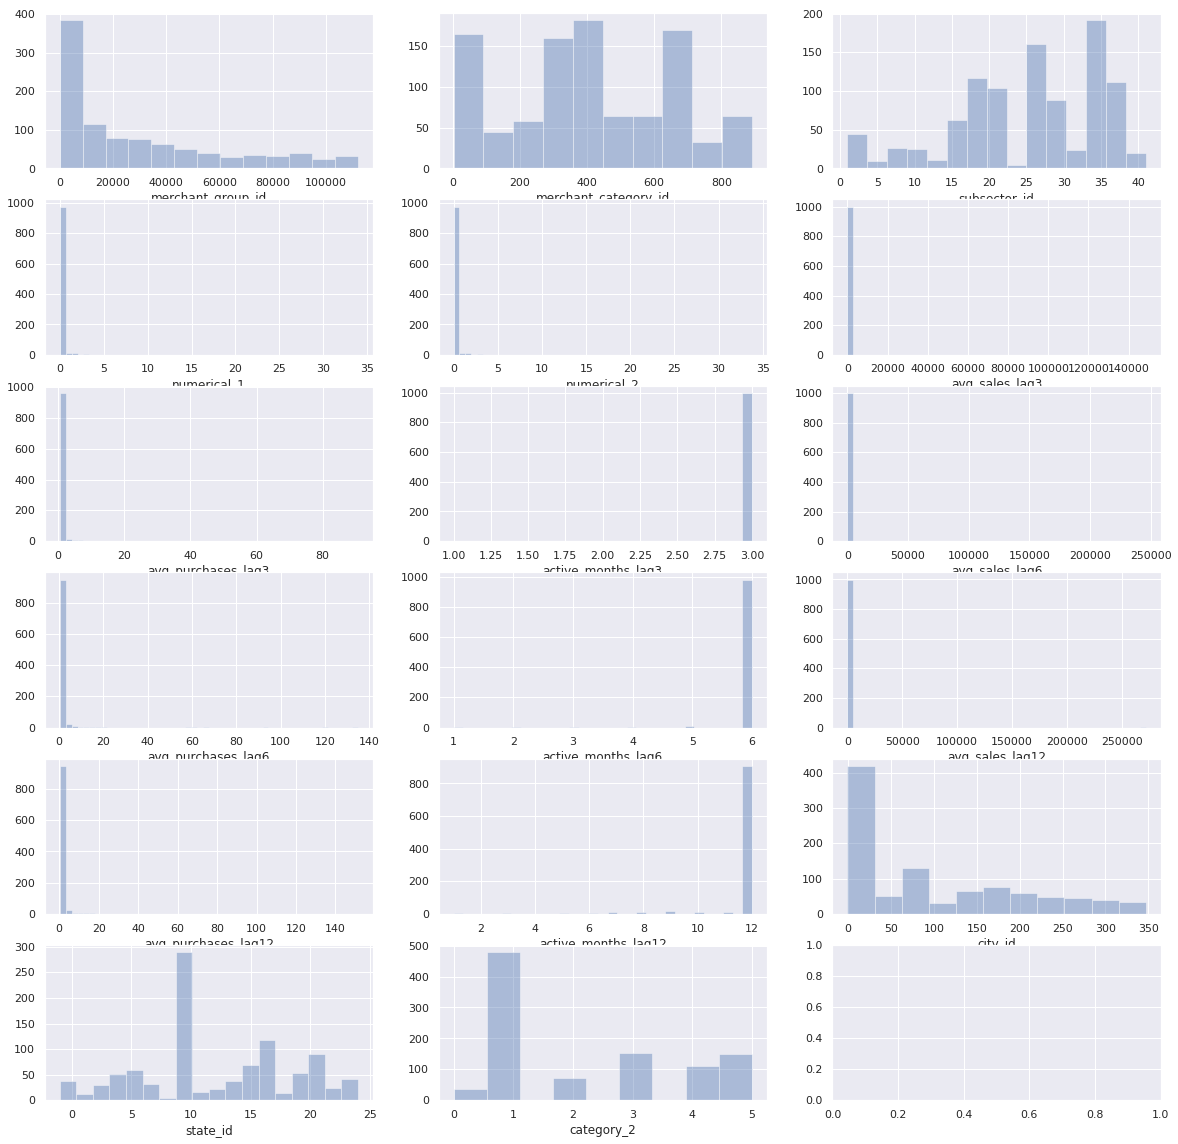

In [23]:
f, axes = plt.subplots(6, 3, figsize=(20,20), sharex=False)
for ax, key in zip(axes.flat, merchants._get_numeric_data().columns):
    sns.distplot(merchants_sample[key], ax=ax, kde=False)

In [24]:
categorical_columns = list(set(merchants.columns) - set(merchants._get_numeric_data().columns))
for c in categorical_columns:
    print(c + ":" + str(len(pd.unique(merchants_sample[c]))))

most_recent_purchases_range:5
category_1:2
most_recent_sales_range:5
merchant_id:1000
category_4:2


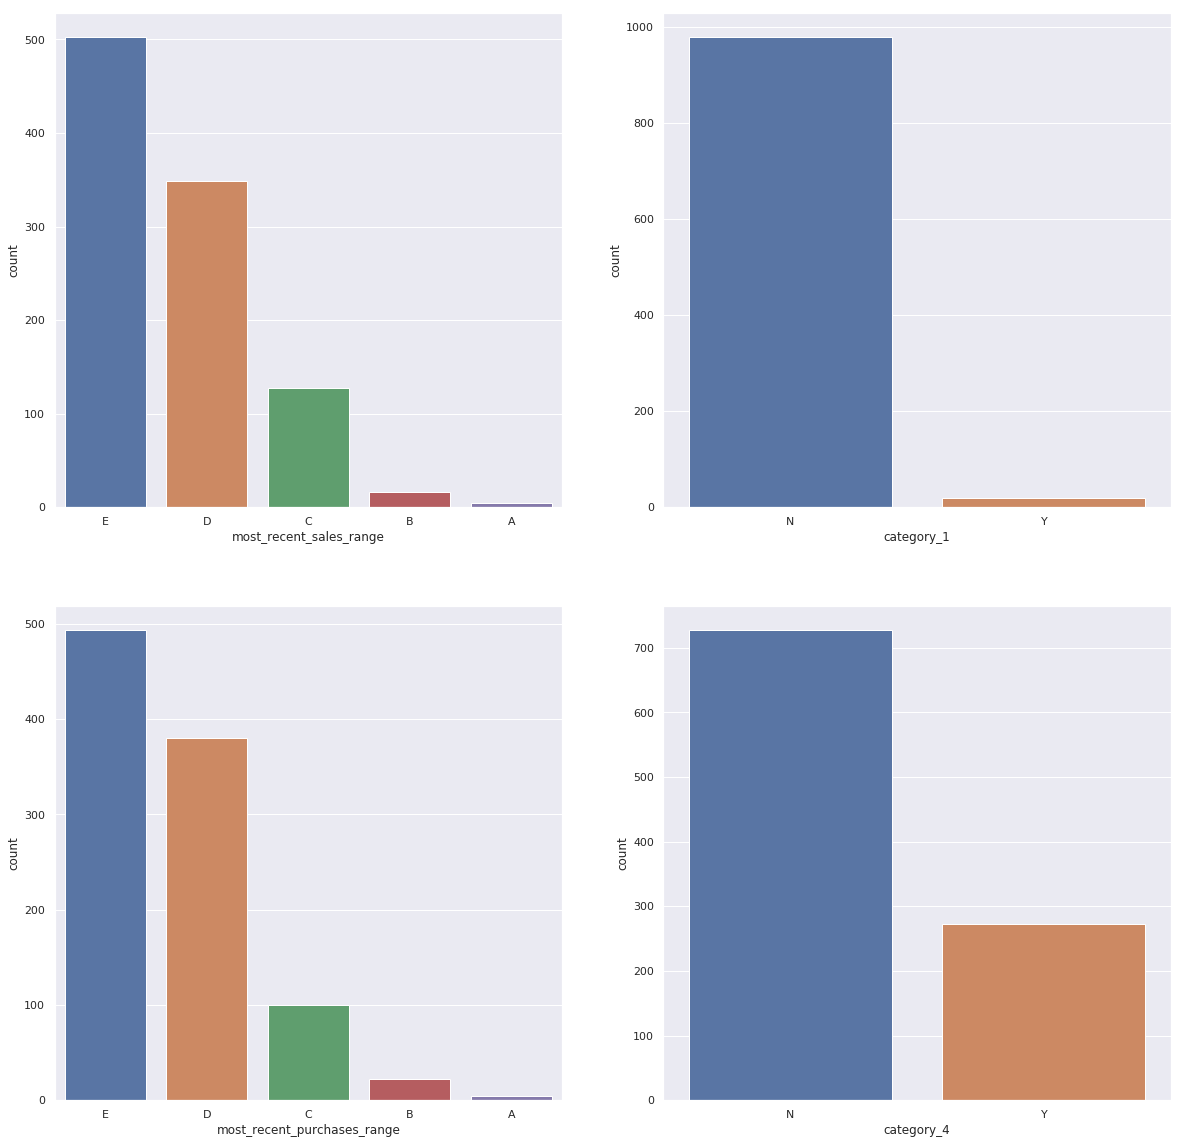

In [25]:
f, axes = plt.subplots(2, 2, figsize=(20,20), sharex=False)
for ax, key in zip(axes.flat, ["most_recent_sales_range", "category_1", "most_recent_purchases_range", "category_4"]):
    sns.countplot(x=key, data=merchants_sample, ax=ax)

### 다시 historical_transactions 에 대해서 알아보자

In [26]:
historical_transactions.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.645950e+07,2.911236e+07,2.911236e+07
mean,1.293256e+02,6.484954e-01,4.810130e+02,-4.487294e+00,3.640090e-02,2.194578e+00,1.056679e+01,2.684839e+01
std,1.042563e+02,2.795577e+00,2.493757e+02,3.588800e+00,1.123522e+03,1.531896e+00,6.366927e+00,9.692793e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,9.000000e+01,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.000000e+00,1.600000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,0.000000e+00,6.010604e+06,5.000000e+00,2.400000e+01,4.100000e+01


In [27]:
historical_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int64
category_1              object
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           datetime64[ns]
category_2              float64
state_id                int64
subsector_id            int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 3.0+ GB


In [28]:
historical_transactions_sample = historical_transactions.sample(100000)
historical_transactions_sample.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
16065543,Y,C_ID_6599fe9709,69,N,3,C,367,M_ID_181e9aff33,0,-0.564396,2018-02-08 14:26:42,1.0,9,16
27487387,N,C_ID_229b504f54,-1,Y,1,B,367,M_ID_66b0385c20,-3,-0.485717,2017-11-21 17:34:38,NaN,-1,16
28946797,Y,C_ID_05e0a22af4,69,N,0,A,387,M_ID_e27d4bbe57,-2,-0.701528,2017-07-01 16:04:34,1.0,9,36
10687467,Y,C_ID_3c157a2762,69,N,1,B,367,M_ID_181e9aff33,-10,-0.639468,2017-04-29 14:09:56,1.0,9,16
3996034,Y,C_ID_b3bd916cbd,53,N,2,C,598,M_ID_c3b694d3b2,-9,-0.326165,2017-05-17 14:54:53,5.0,20,7


In [29]:
historical_transactions_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 16065543 to 26439819
Data columns (total 14 columns):
authorized_flag         100000 non-null object
card_id                 100000 non-null object
city_id                 100000 non-null int64
category_1              100000 non-null object
installments            100000 non-null int64
category_3              99419 non-null object
merchant_category_id    100000 non-null int64
merchant_id             99562 non-null object
month_lag               100000 non-null int64
purchase_amount         100000 non-null float64
purchase_date           100000 non-null datetime64[ns]
category_2              90866 non-null float64
state_id                100000 non-null int64
subsector_id            100000 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 11.4+ MB


In [30]:
historical_transactions_sample["category_3"] = historical_transactions_sample["category_3"].fillna(value="X")
historical_transactions_sample["merchant_id"] = historical_transactions_sample["merchant_id"].fillna(value="X")
historical_transactions_sample["category_2"] = historical_transactions_sample["category_2"].fillna(value=0)

In [31]:
historical_transactions_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 16065543 to 26439819
Data columns (total 14 columns):
authorized_flag         100000 non-null object
card_id                 100000 non-null object
city_id                 100000 non-null int64
category_1              100000 non-null object
installments            100000 non-null int64
category_3              100000 non-null object
merchant_category_id    100000 non-null int64
merchant_id             100000 non-null object
month_lag               100000 non-null int64
purchase_amount         100000 non-null float64
purchase_date           100000 non-null datetime64[ns]
category_2              100000 non-null float64
state_id                100000 non-null int64
subsector_id            100000 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 11.4+ MB


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


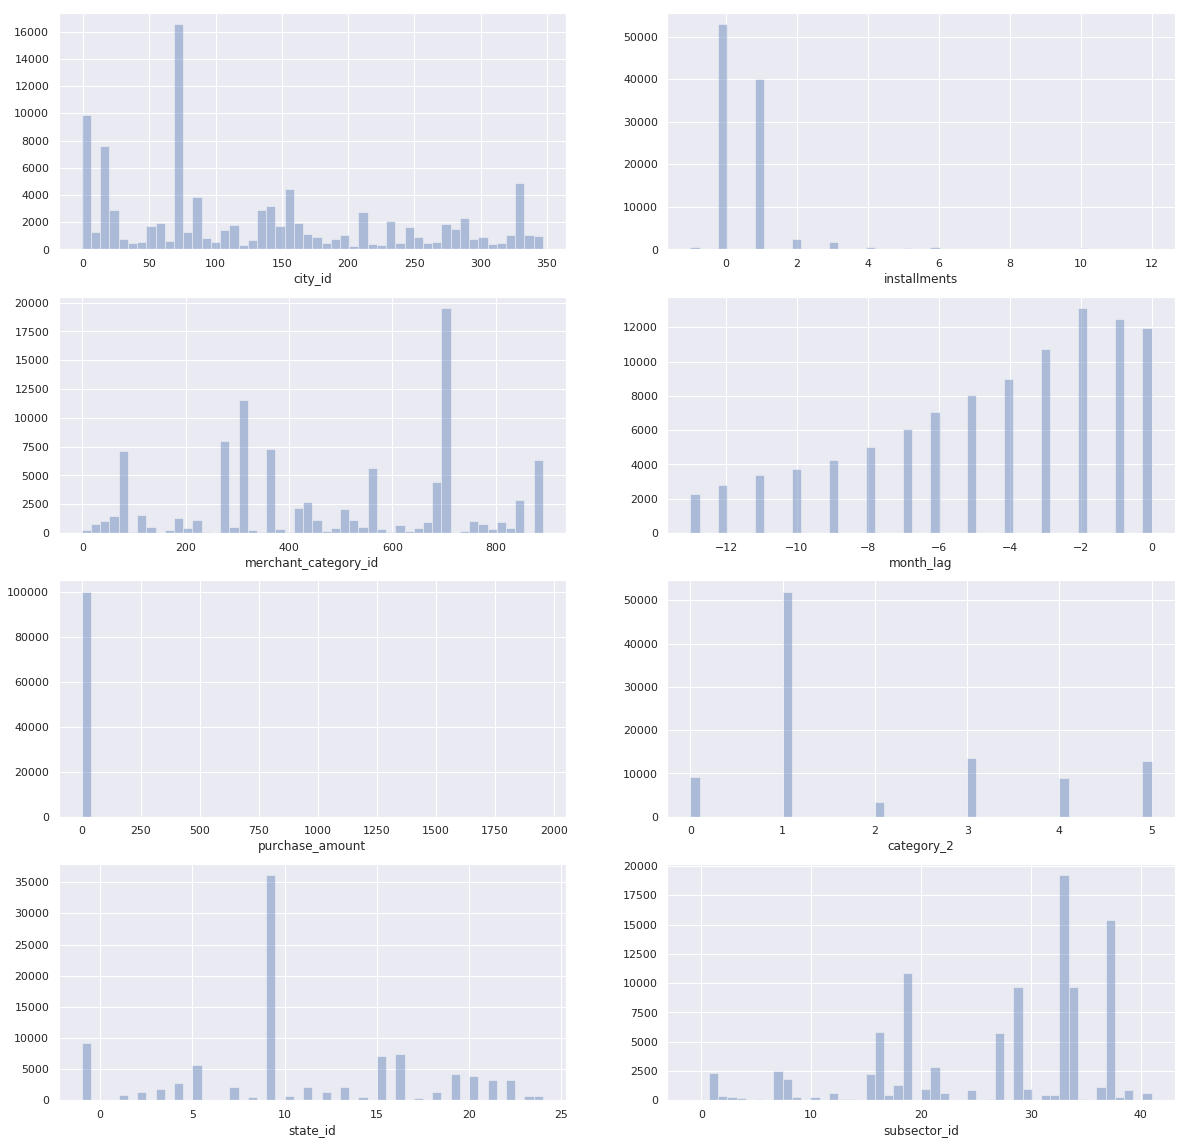

In [32]:
f, axes = plt.subplots(4, 2, figsize=(20,20), sharex=False)
for ax, key in zip(axes.flat, historical_transactions_sample._get_numeric_data().columns):
    sns.distplot(historical_transactions_sample[key], ax=ax, kde=False)

In [33]:
categorical_columns = list(set(historical_transactions_sample.columns) - set(historical_transactions_sample._get_numeric_data().columns))
for c in categorical_columns:
    print(c + ":" + str(len(pd.unique(historical_transactions_sample[c]))))

authorized_flag:2
category_1:2
merchant_id:41751
card_id:74419
purchase_date:97047
category_3:4


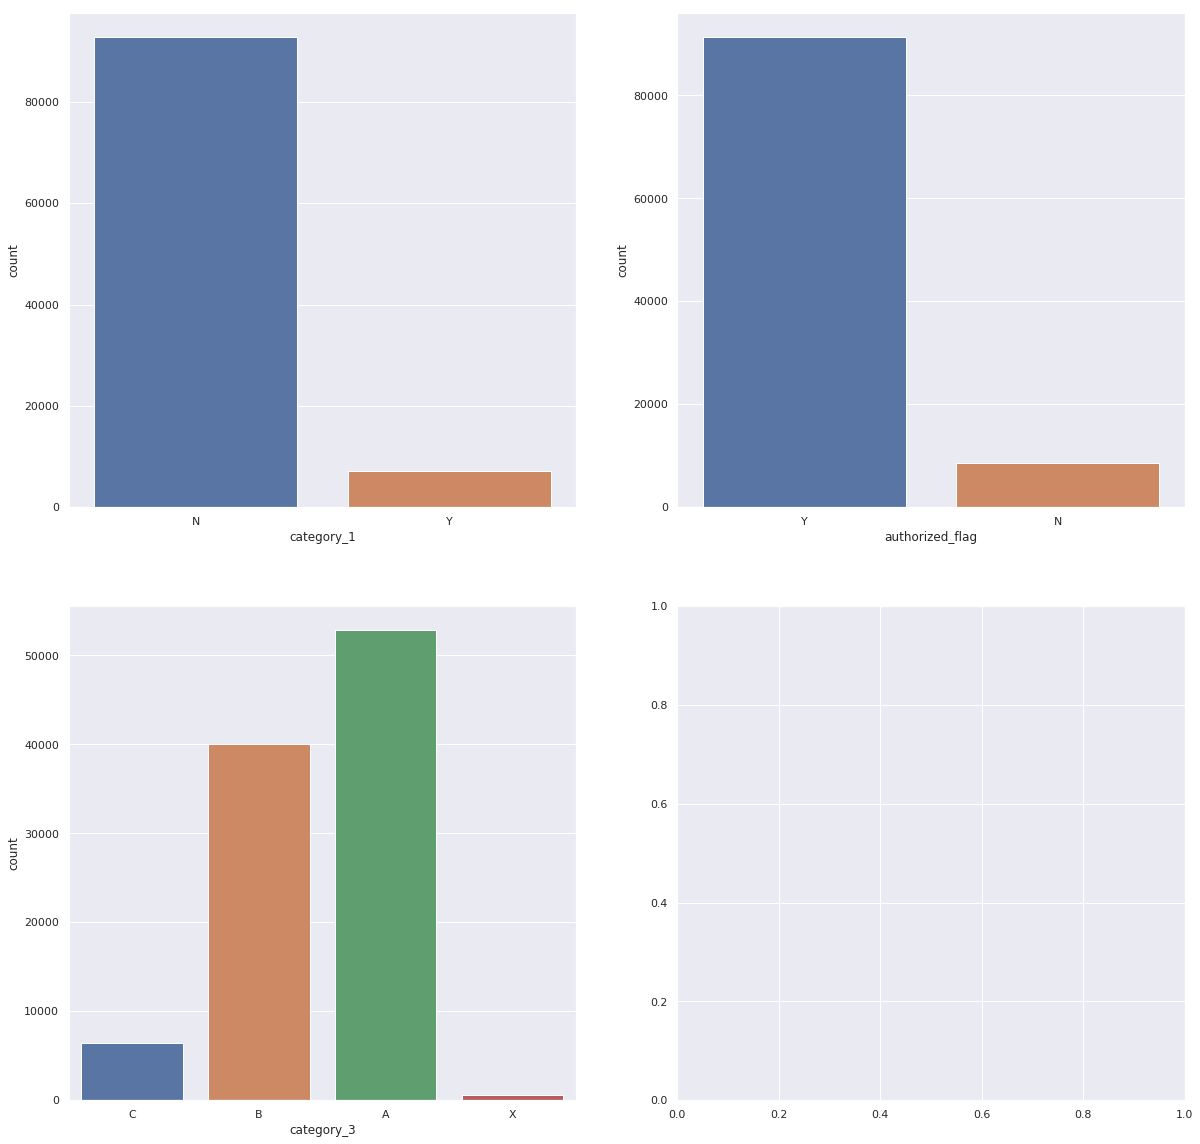

In [34]:
f, axes = plt.subplots(2, 2, figsize=(20,20), sharex=False)
for ax, key in zip(axes.flat, ["category_1", "authorized_flag", "category_3"]):
    sns.countplot(x=key, data=historical_transactions_sample, ax=ax)

### 이제 Train 에 대해서 알아보자

In [35]:
train.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null object
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


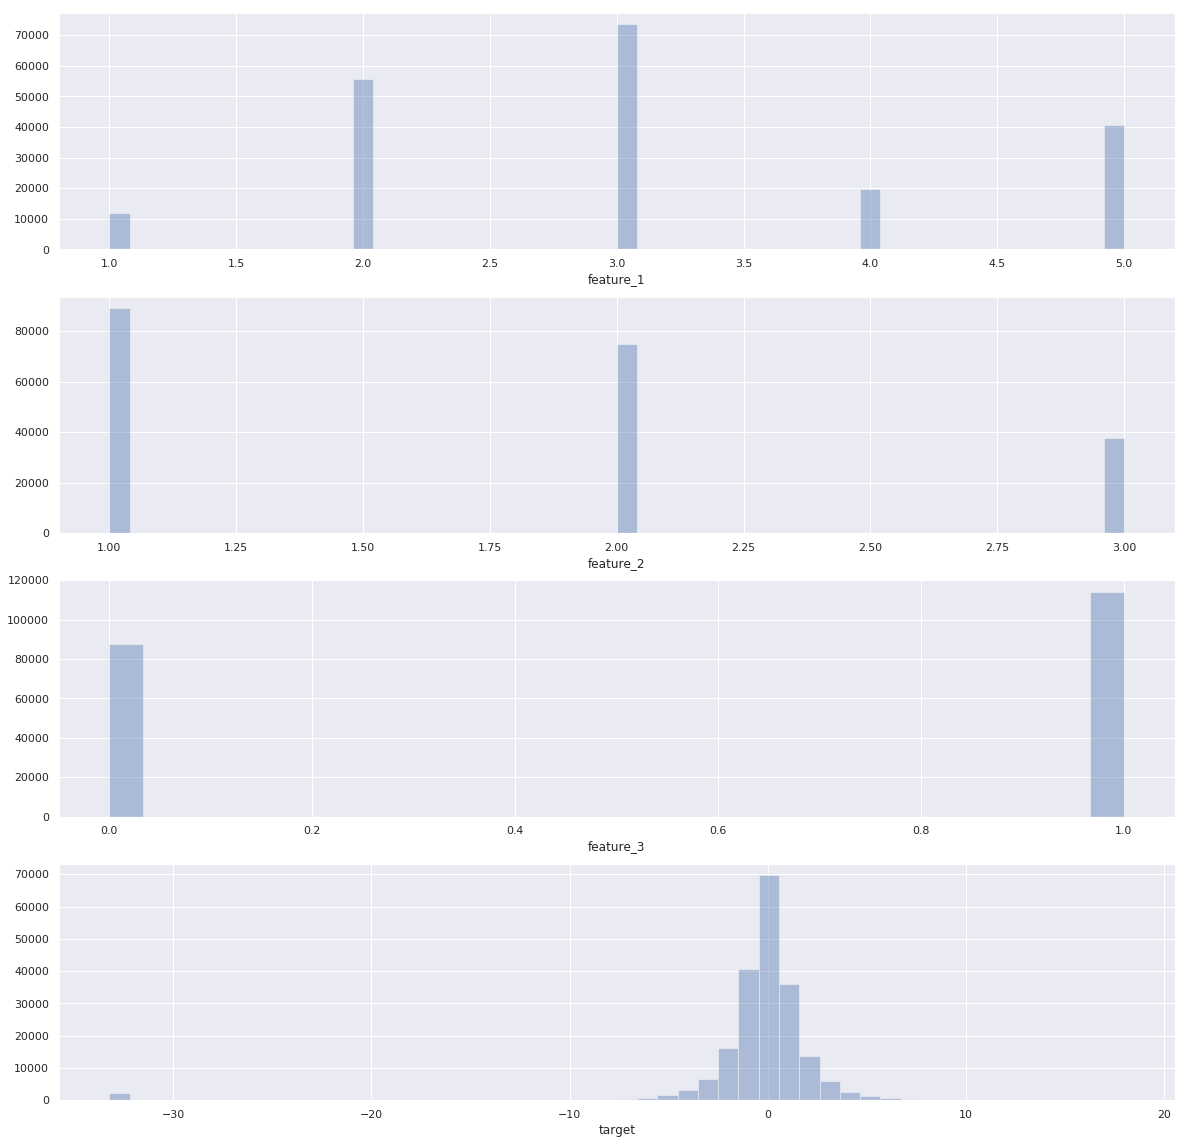

In [37]:
f, axes = plt.subplots(4, 1, figsize=(20,20), sharex=False)
for ax, key in zip(axes.flat, train._get_numeric_data().columns):
    sns.distplot(train[key], ax=ax, kde=False)

In [38]:
categorical_columns = list(set(train.columns) - set(train._get_numeric_data().columns))
for c in categorical_columns:
    print(c + ":" + str(len(pd.unique(train[c]))))

card_id:201917
first_active_month:75


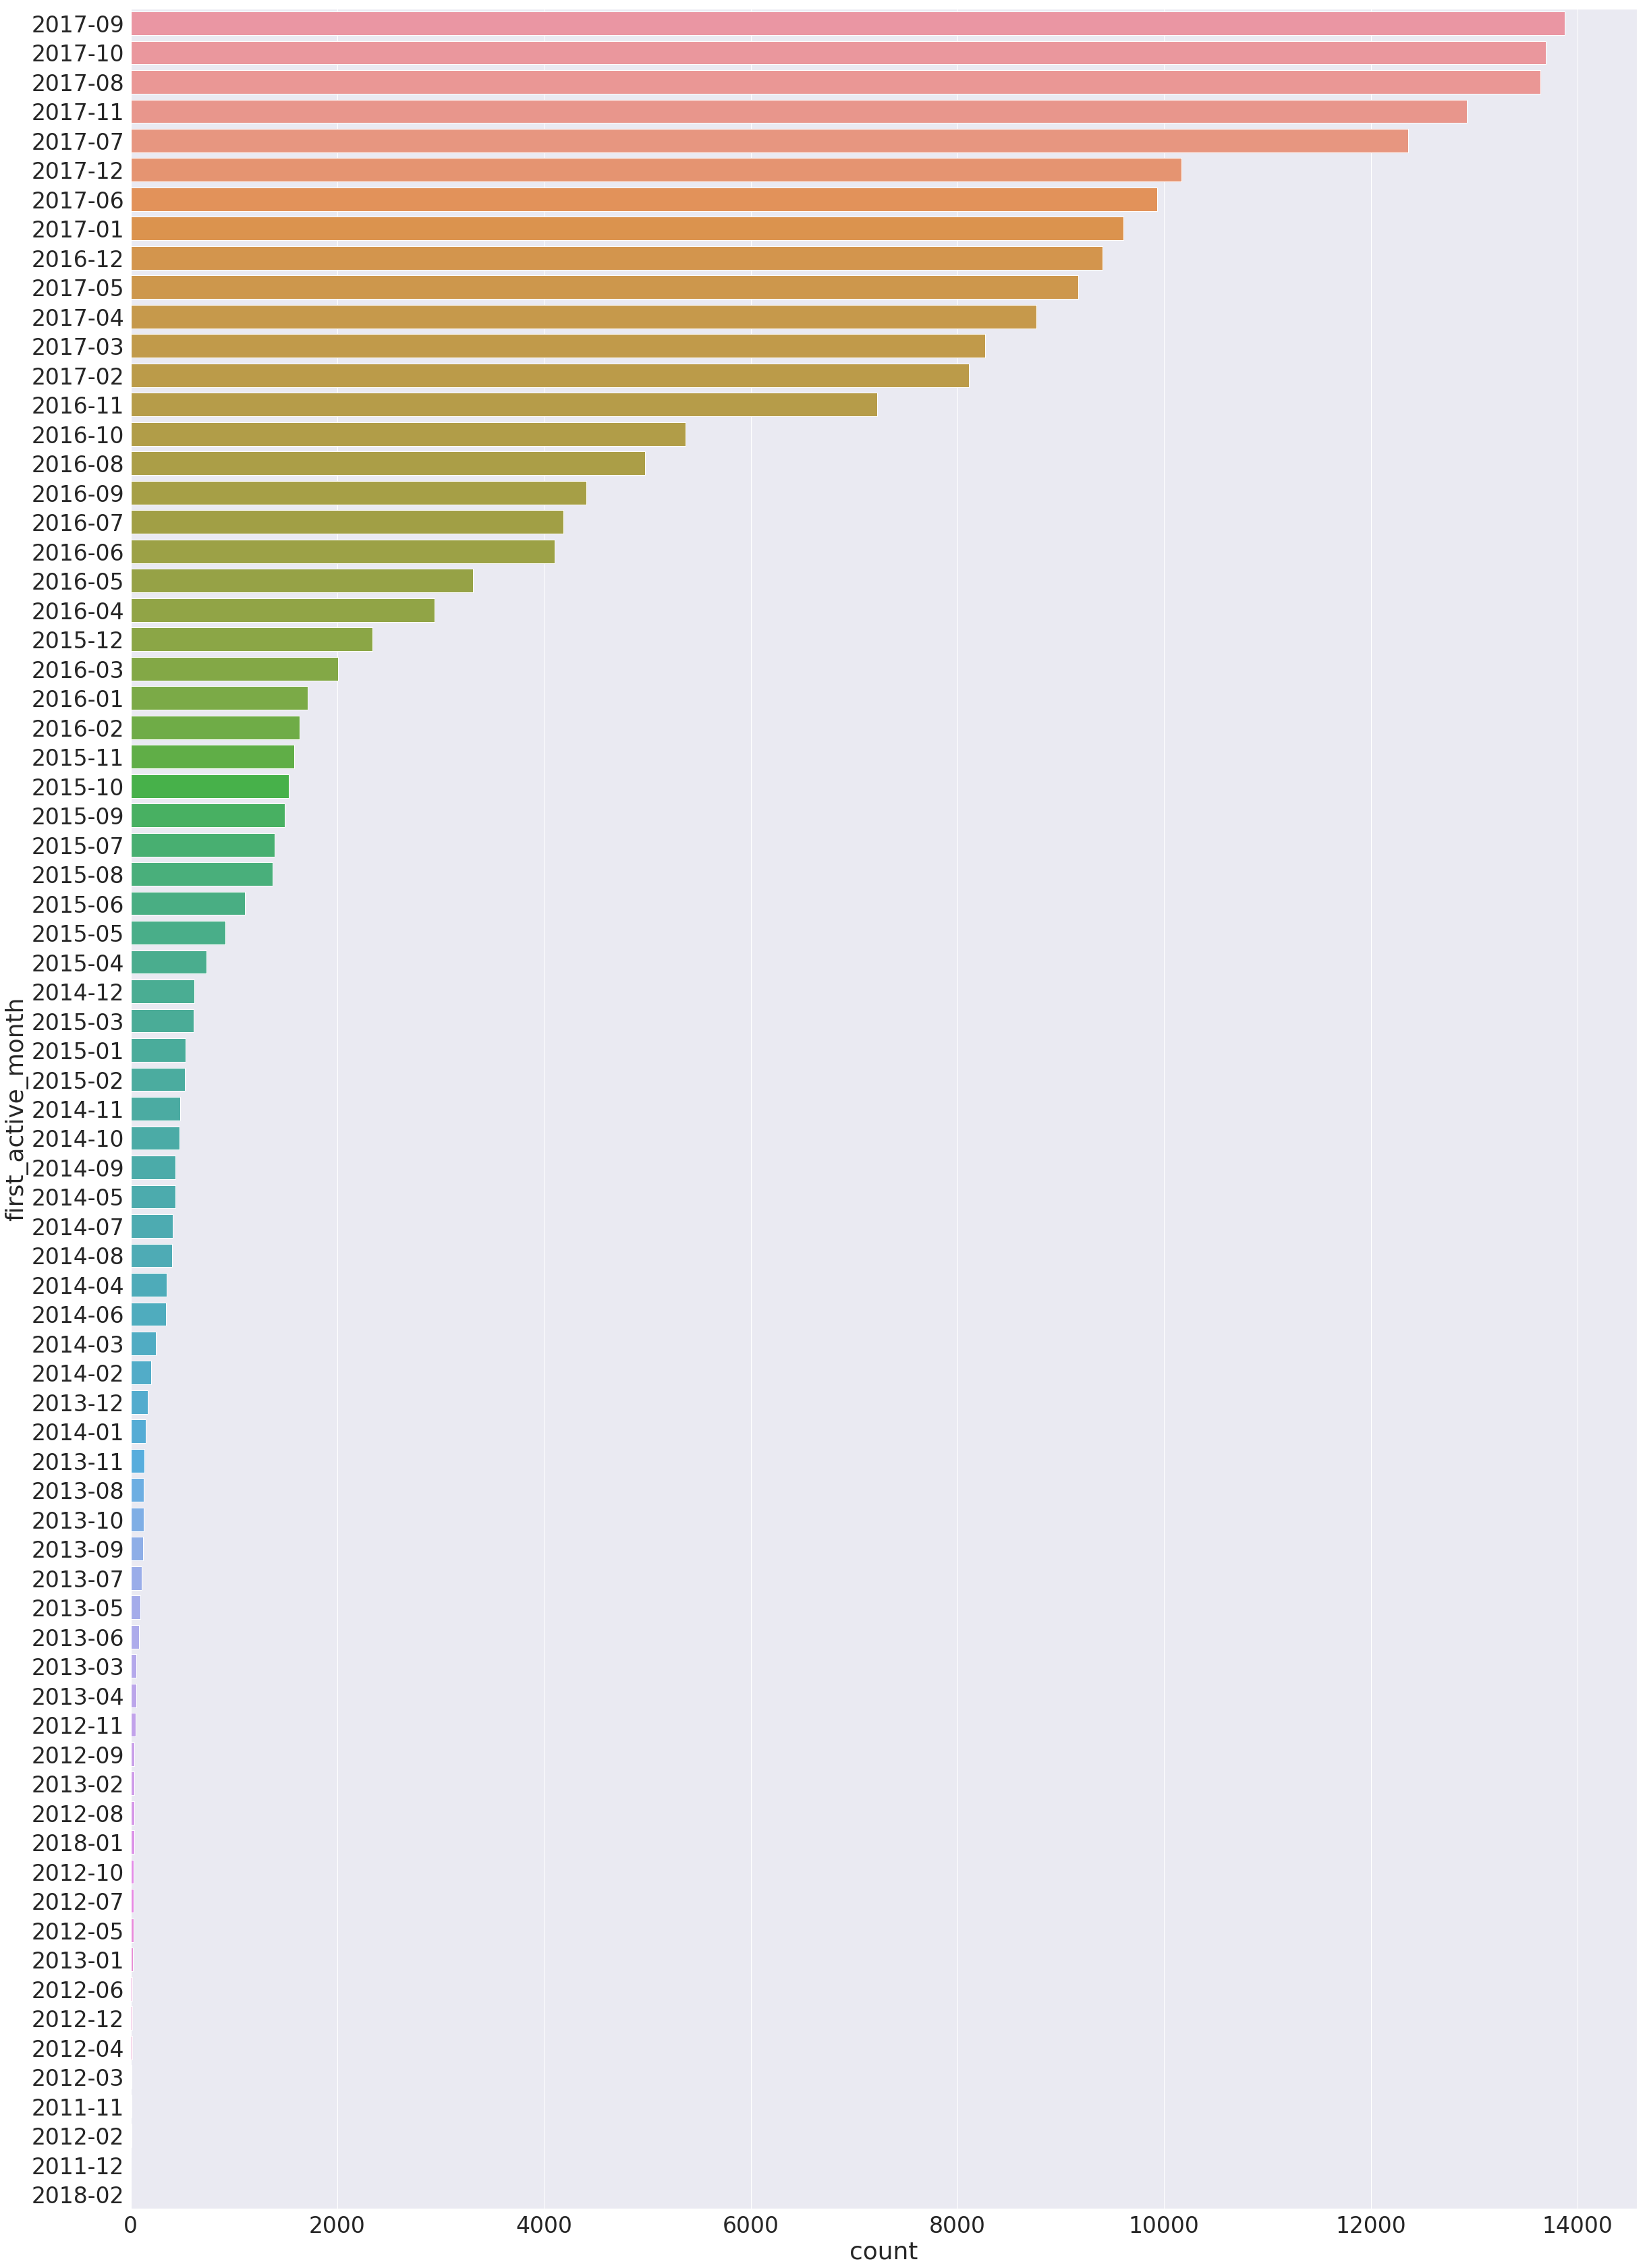

In [39]:
plt.figure(figsize=(40,60))
sns.set(font_scale=3)
sns.countplot(y="first_active_month", data=train, order=train["first_active_month"].value_counts().index)

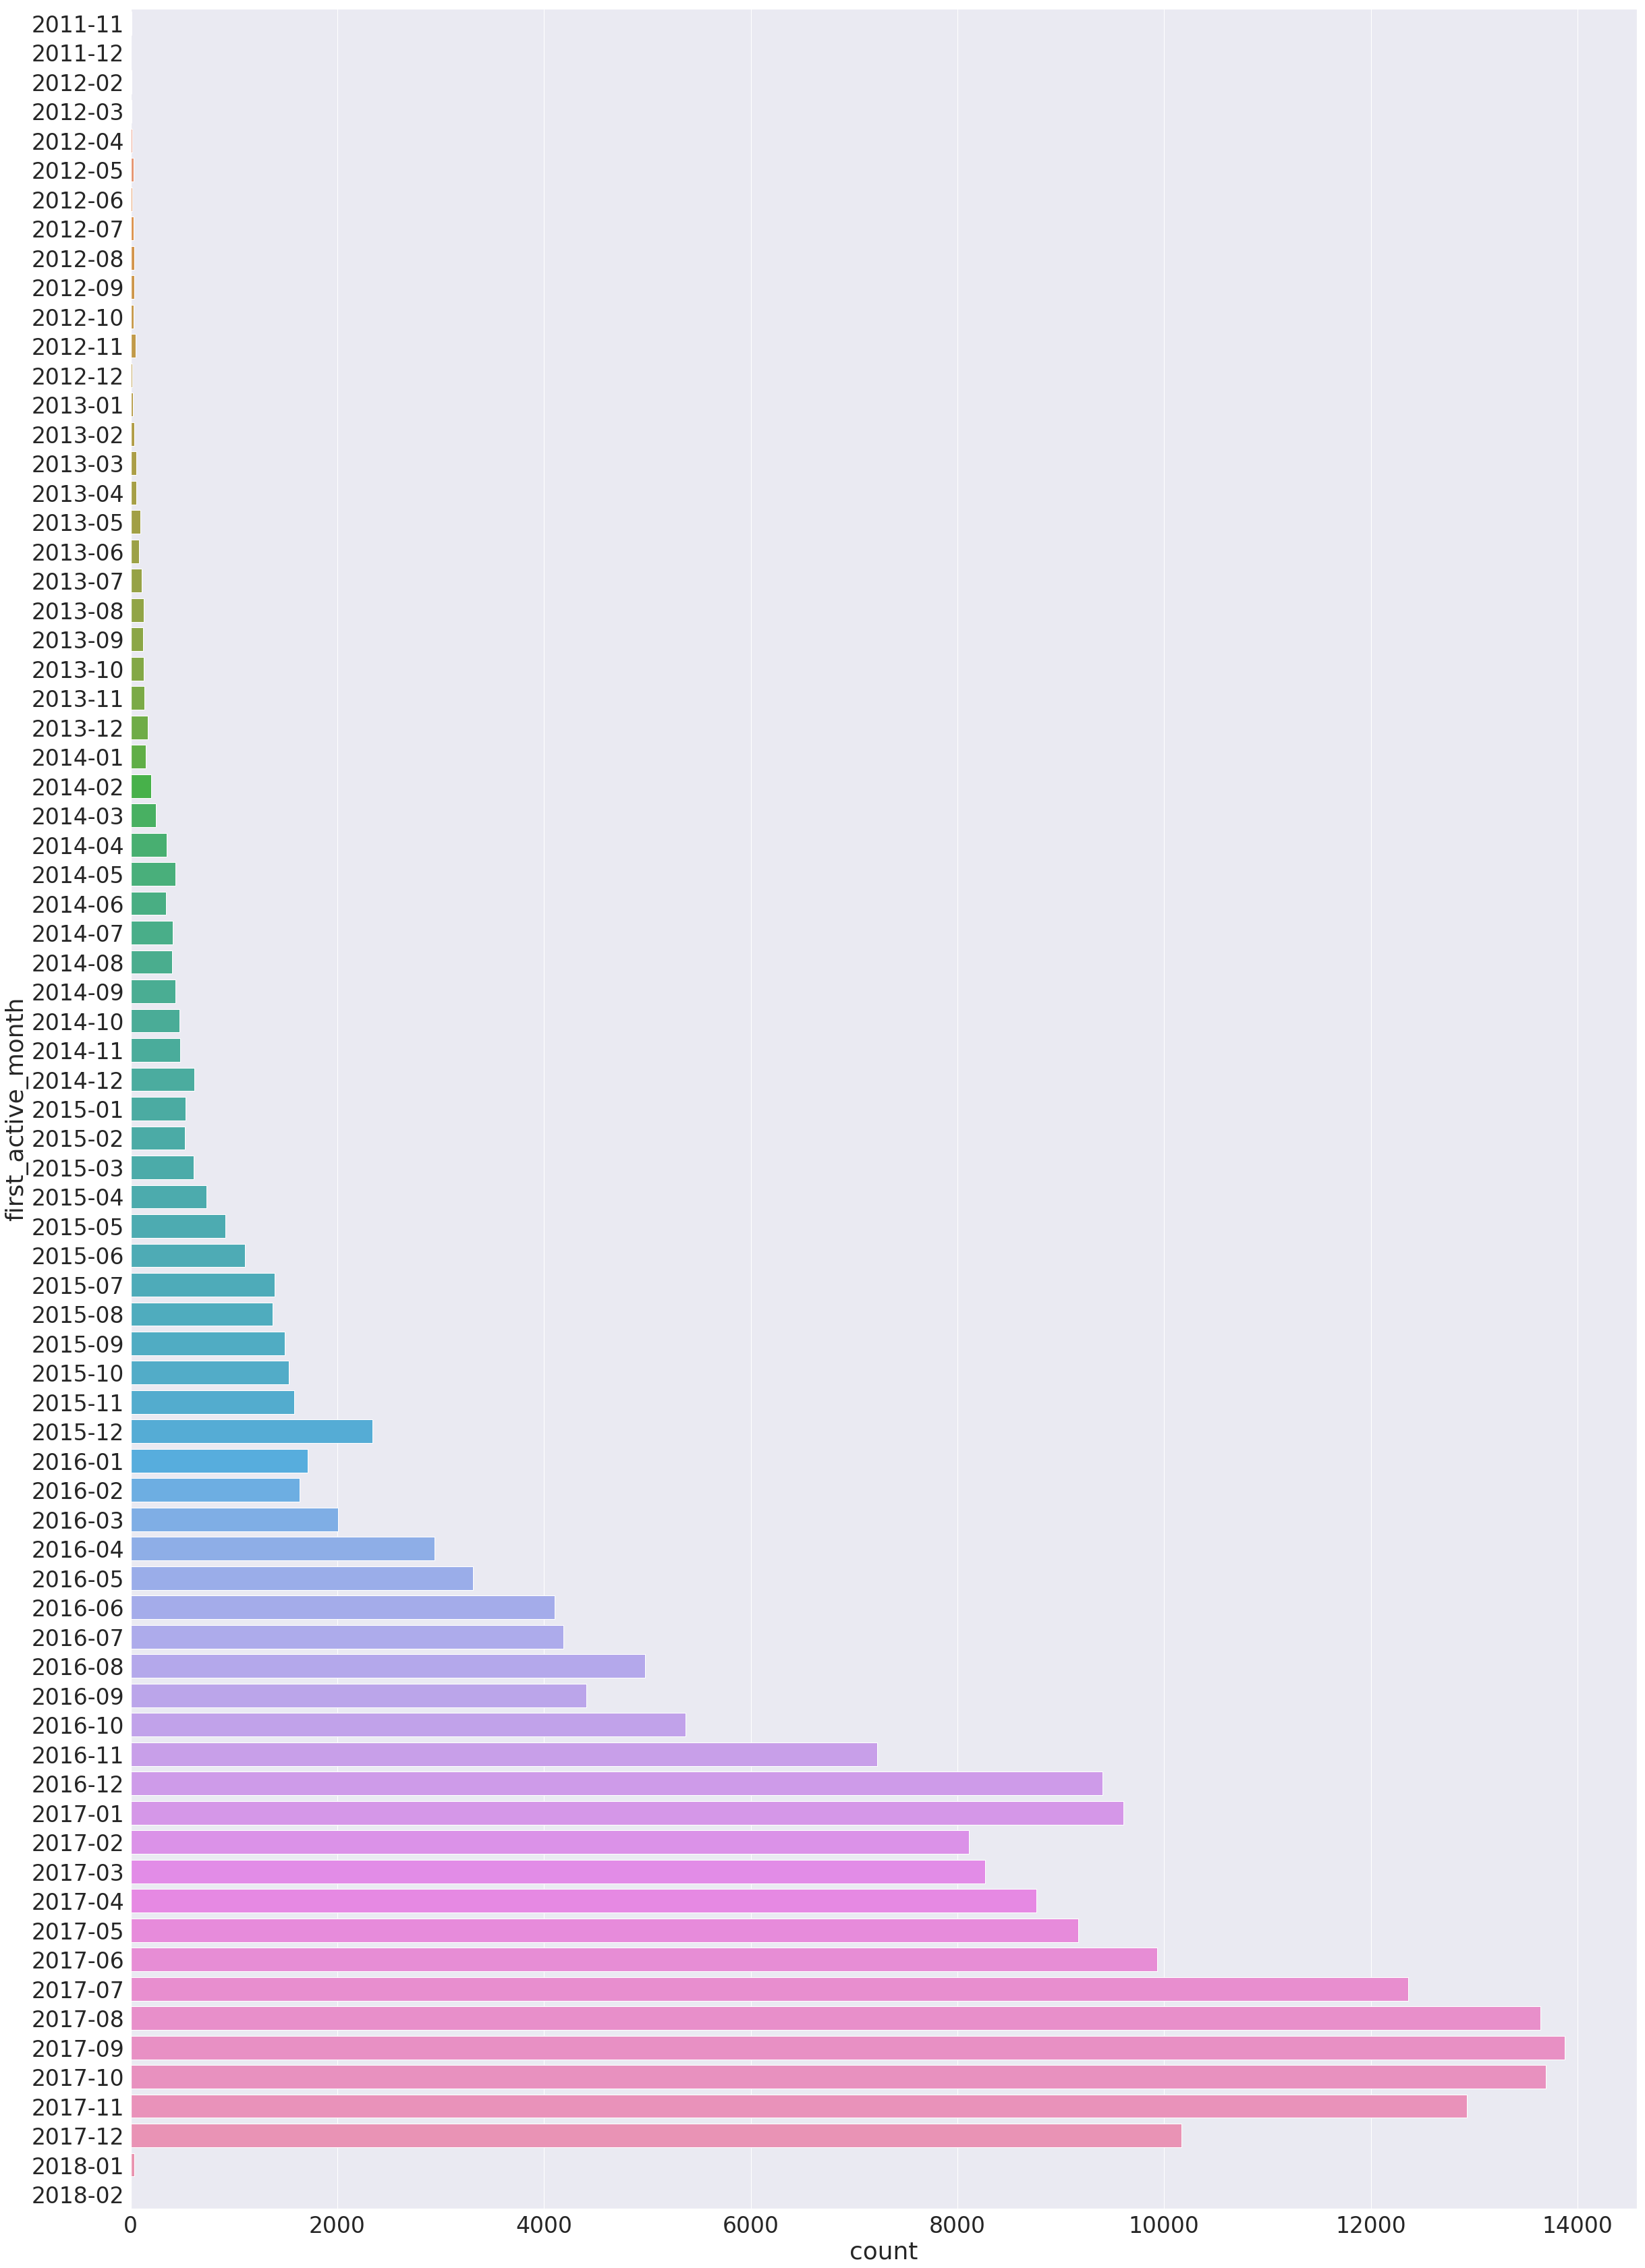

In [40]:
plt.figure(figsize=(40,60))
sns.set(font_scale=3)
sns.countplot(y="first_active_month", data=train.sort_values(["first_active_month"]))